<h1>Breast Cancer Prediction</h1>
<h2>Week 1 One note</h2>
<p>Convert R code to Python </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
col_names = ["id","ClumpThickness","UniformityCellSize",
               "UniformityCellShape",
               "MarginalAdhesion",
               "SingleEpithelialCellSize",
               "BareNuclei",
               "BlandChromatin",
               "NormalNucleoli",
               "Mitoses",
               "Class"]

In [4]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None,names=col_names)
df.head()

,id,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        699 non-null    int64 
 1   ClumpThickness            699 non-null    int64 
 2   UniformityCellSize        699 non-null    int64 
 3   UniformityCellShape       699 non-null    int64 
 4   MarginalAdhesion          699 non-null    int64 
 5   SingleEpithelialCellSize  699 non-null    int64 
 6   BareNuclei                699 non-null    object
 7   BlandChromatin            699 non-null    int64 
 8   NormalNucleoli            699 non-null    int64 
 9   Mitoses                   699 non-null    int64 
 10  Class                     699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### BareNuclei is string object, the variables must be numeric to feed in models
The methods to convert dataframe series are listed <a href='https://stackoverflow.com/questions/15891038/change-column-type-in-pandas'>here.</a>

In [6]:
df['BareNuclei'] = pd.to_numeric(df['BareNuclei'],errors='coerce')

## Check Missing Values
### df.isna() and df.isnull()
### Both are used to check null values
<ul>
    <li>df.isnull() <i>To check all fields that contain null, return dataframe with boolean</i></li>
    <li>df.isnull().any() <i>To check all columns that contain null, return boolean</i></li>
    <li>df.isnull().sum() <i>To check all columns that contain null, return boolean</i></li>
    <li>df.isnull().sum().plot(kind='bar') <i>To plot the missing values in barplot</i></li>
</ul>

In [7]:
df.isnull().any()

id                          False
ClumpThickness              False
UniformityCellSize          False
UniformityCellShape         False
MarginalAdhesion            False
SingleEpithelialCellSize    False
BareNuclei                   True
BlandChromatin              False
NormalNucleoli              False
Mitoses                     False
Class                       False
dtype: bool

In [8]:
df.isna().sum()

id                           0
ClumpThickness               0
UniformityCellSize           0
UniformityCellShape          0
MarginalAdhesion             0
SingleEpithelialCellSize     0
BareNuclei                  16
BlandChromatin               0
NormalNucleoli               0
Mitoses                      0
Class                        0
dtype: int64

<AxesSubplot:title={'center':'Plot missing values'}>

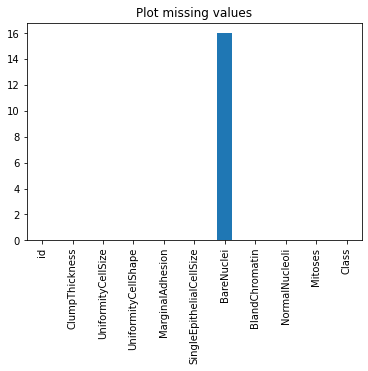

In [9]:
# plot missing values
df.isna().sum().plot(kind='bar',title='Plot missing values')

In [10]:
df = df.dropna()

In [11]:
# Check Total Missing Values
df.isna().any()

id                          False
ClumpThickness              False
UniformityCellSize          False
UniformityCellShape         False
MarginalAdhesion            False
SingleEpithelialCellSize    False
BareNuclei                  False
BlandChromatin              False
NormalNucleoli              False
Mitoses                     False
Class                       False
dtype: bool

<AxesSubplot:title={'center':'Plot missing values'}>

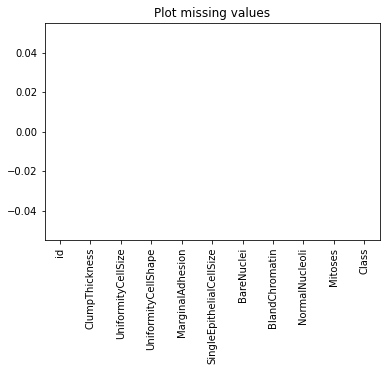

In [12]:
# plot missing values
df.isna().sum().plot(kind='bar',title='Plot missing values')

In [13]:
# Drop ID
df = df.drop(['id'],axis=1)

In [14]:
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

<AxesSubplot:title={'center':'Class (2 = Benign, 4 = Maglignant)'}>

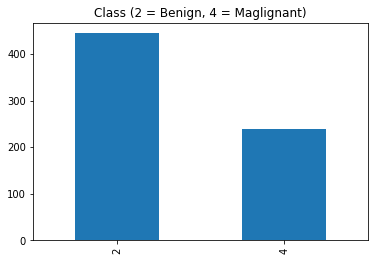

In [15]:
df['Class'].value_counts().plot(kind='bar',title='Class (2 = Benign, 4 = Maglignant)')

<AxesSubplot:>

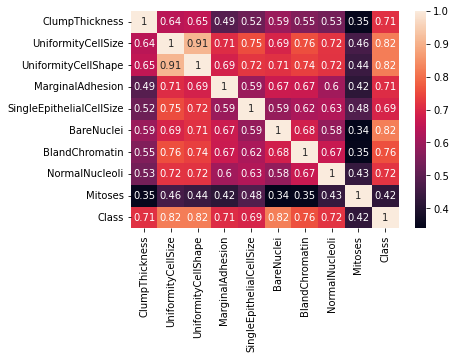

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df['Class'] = df['Class'].apply(lambda x: 1 if x == 2 else 2)

In [18]:
df['Class']

0      1
1      1
2      1
3      1
4      1
      ..
694    1
695    1
696    2
697    2
698    2
Name: Class, Length: 683, dtype: int64

### Naive Bayes documentation
<p>To learn more about Naive Bayes <a href='https://scikit-learn.org/stable/modules/naive_bayes.html'>sklearn.naive_bayes documentation</a></p>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [20]:
y = df[['Class']]
x = df.iloc[:,0:10]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0, stratify = y)

In [22]:
nb = GaussianNB()
nb.fit(x_train, np.ravel(y_train)).predict(x_test)

array([1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 1], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,nb.predict(x_test))

array([[89,  0],
       [ 0, 48]], dtype=int64)